In [179]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

In [2]:
sc = MinMaxScaler(feature_range = (0, 1))

dataset = pd.read_csv("../data/database.txt")

In [14]:
size = len(dataset)
size

2012

In [17]:
length = len(dataset.iloc[0].tolist())
length

1121

In [22]:
lensensor = (length - 1 )/8

In [28]:
def meanValue(inp):
    mean = 0
    length = len(inp)
    for i in inp:
        mean += i
    mean /= length
    return mean

In [193]:
dataset_train = []

for row in [np.array(dataset.iloc[j].tolist()) for j in range(size)]:
    newrow = []
    label = row[length-1]
    row = row[:length-1]# - row.min()
    for i in range(8):
        newrow.append(meanValue(row[i*140:i*140+140]))
    newrow.append(int(label))
    dataset_train.append(newrow)  

In [194]:
dataset_train = np.array(dataset_train)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [195]:
Y_train = [int(i) for i in Y_train]


In [196]:
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]

In [197]:
X_train.shape

(2012, 8)

In [198]:
Y_train.shape

(2012, 5)

In [199]:
model = Sequential()

model.add(Dense(8, input_shape=(8,)))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Dropout(0.3))

model.add(Dense(units = 5, activation="softmax"))

In [200]:
mcp_save = ModelCheckpoint("../Data/workligth_.h5", save_best_only=True, monitor='val_acc', mode='max')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [201]:
history = model.fit(X_train, Y_train,validation_split=0.2, epochs = 150, batch_size = 8, verbose=2,callbacks=[mcp_save])

Train on 1609 samples, validate on 403 samples
Epoch 1/150
 - 1s - loss: 0.4146 - acc: 0.8140 - val_loss: 0.3056 - val_acc: 0.8789
Epoch 2/150
 - 0s - loss: 0.3041 - acc: 0.8620 - val_loss: 0.2289 - val_acc: 0.9315
Epoch 3/150
 - 0s - loss: 0.2566 - acc: 0.8931 - val_loss: 0.1918 - val_acc: 0.9280
Epoch 4/150
 - 0s - loss: 0.2389 - acc: 0.8981 - val_loss: 0.1666 - val_acc: 0.9414
Epoch 5/150
 - 0s - loss: 0.2177 - acc: 0.9073 - val_loss: 0.1490 - val_acc: 0.9504
Epoch 6/150
 - 0s - loss: 0.1989 - acc: 0.9127 - val_loss: 0.1320 - val_acc: 0.9573
Epoch 7/150
 - 0s - loss: 0.1833 - acc: 0.9249 - val_loss: 0.1200 - val_acc: 0.9573
Epoch 8/150
 - 0s - loss: 0.1796 - acc: 0.9204 - val_loss: 0.1112 - val_acc: 0.9608
Epoch 9/150
 - 0s - loss: 0.1727 - acc: 0.9244 - val_loss: 0.1024 - val_acc: 0.9628
Epoch 10/150
 - 0s - loss: 0.1638 - acc: 0.9314 - val_loss: 0.0978 - val_acc: 0.9628
Epoch 11/150
 - 0s - loss: 0.1534 - acc: 0.9331 - val_loss: 0.0919 - val_acc: 0.9633
Epoch 12/150
 - 0s - loss: 

Epoch 97/150
 - 0s - loss: 0.0940 - acc: 0.9627 - val_loss: 0.0609 - val_acc: 0.9727
Epoch 98/150
 - 0s - loss: 0.0964 - acc: 0.9556 - val_loss: 0.0613 - val_acc: 0.9712
Epoch 99/150
 - 0s - loss: 0.1047 - acc: 0.9556 - val_loss: 0.0615 - val_acc: 0.9692
Epoch 100/150
 - 0s - loss: 0.1022 - acc: 0.9562 - val_loss: 0.0621 - val_acc: 0.9692
Epoch 101/150
 - 0s - loss: 0.1018 - acc: 0.9570 - val_loss: 0.0616 - val_acc: 0.9737
Epoch 102/150
 - 0s - loss: 0.0989 - acc: 0.9581 - val_loss: 0.0606 - val_acc: 0.9707
Epoch 103/150
 - 0s - loss: 0.0973 - acc: 0.9605 - val_loss: 0.0599 - val_acc: 0.9747
Epoch 104/150
 - 0s - loss: 0.1030 - acc: 0.9559 - val_loss: 0.0618 - val_acc: 0.9717
Epoch 105/150
 - 0s - loss: 0.0987 - acc: 0.9572 - val_loss: 0.0604 - val_acc: 0.9742
Epoch 106/150
 - 0s - loss: 0.1012 - acc: 0.9605 - val_loss: 0.0607 - val_acc: 0.9737
Epoch 107/150
 - 0s - loss: 0.0995 - acc: 0.9617 - val_loss: 0.0612 - val_acc: 0.9707
Epoch 108/150
 - 0s - loss: 0.0999 - acc: 0.9617 - val_lo

Text(0.5, 1.0, 'Accuracy')

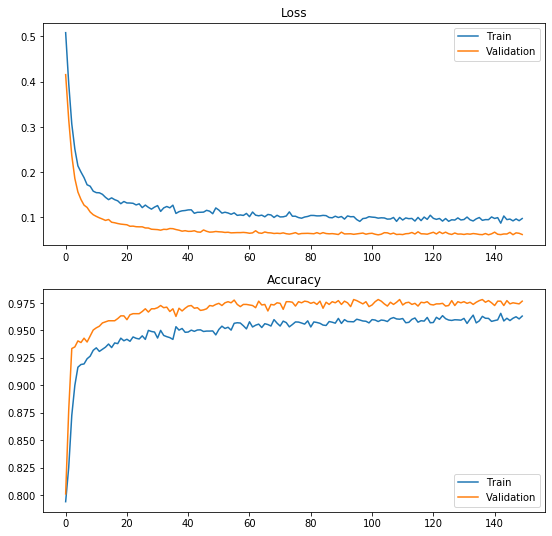

In [183]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

In [130]:
model.save("../Data/ligth.h5")
print("Saved model to disk")

Saved model to disk


In [131]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [132]:
from keras.models import load_model
from keras import backend as K

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [133]:
model = load_model('../Data/ligth.h5')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [134]:
model.outputs

[<tf.Tensor 'dense_22_1/Softmax:0' shape=(?, 5) dtype=float32>]

In [135]:
model.inputs

[<tf.Tensor 'dense_20_input_1:0' shape=(?, 8) dtype=float32>]

In [136]:
frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

INFO:tensorflow:Froze 191 variables.
Converted 191 variables to const ops.


In [137]:
tf.train.write_graph(frozen_graph, "../Models", "ligth.pb", as_text=False)

'../Models\\ligth.pb'

In [138]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 45        
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________
None
